# Ансамбли моделей машинного обучения
## 1)Выберите набор данных (датасет) для решения задачи классификации или регресии.
## Импорт библиотек

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from typing import Dict, Tuple
from scipy import stats
from sklearn.datasets import load_iris
from IPython.display import Image
from io import StringIO
from IPython.display import Image
import graphviz
import pydotplus
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
!pip install -U heamy

  Preparing metadata (setup.py) ... done
  Created wheel for heamy: filename=heamy-0.0.7-py2.py3-none-any.whl size=15347 sha256=45c231459434ac63979eb3b82cda74305f276d58c5e7ef638b8ca3ba9c2c86a0
  Stored in directory: /root/.cache/pip/wheels/e5/e4/9a/bc85119b96421369998ff0f53c0854b57bfb518c460fe8c5de
Successfully built heamy


In [ ]:
data=pd.read_csv('breast-cancer.csv',sep=",")

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.shape

(569, 32)

## 2) проверка на пропуски в датасете

In [ ]:
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## 3) Разделим датасет на обучающую и тестовую выборку

In [ ]:
BC_X_train, BC_X_test, BC_y_train, BC_y_test = train_test_split(
    data, data['diagnosis'], test_size=0.5, random_state=1)

In [ ]:
del BC_X_train['diagnosis']
del BC_X_test['diagnosis']

In [ ]:
BC_y_train

138    M
51     B
437    B
112    B
265    M
      ..
129    M
144    B
72     M
235    B
37     B
Name: diagnosis, Length: 284, dtype: object

## 4.1)Обучите следующие ансамблевые модели: одну из моделей группы бэггинга (бэггинг или случайный лес или сверхслучайные деревья);

In [ ]:

# Обучим классификатор на 5 деревьях
bc1 = BaggingClassifier(n_estimators=5, oob_score=True, random_state=10)
bc1.fit(BC_X_train, BC_y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


BaggingClassifier(n_estimators=5, oob_score=True, random_state=10)

In [ ]:
# Какие объекты были использованы в обучающей выборке каждого дерева
bc1.estimators_samples_


[array([137, 138, 254, 282, 202, 238, 179,  50,  34, 221, 280,  43, 242,
        228, 236, 250, 243, 118, 104, 203,  27, 228, 187,  44,  69, 235,
        234, 279, 108, 188,   0, 255,  50, 201,  78,  42, 112,  77, 156,
          4, 114, 270,  56, 170,  39, 248, 196, 191,  43, 139, 237,  80,
        127, 225,  56,  54, 199, 210, 110, 237, 220, 136, 260,  79,  60,
        218, 111, 153, 114, 197, 102, 153,  14, 130, 107, 175, 219,  62,
         37,  14,  52, 120, 224, 171, 176, 171, 213, 190,  39, 242, 104,
         92, 150,  44, 139,  22, 255,  66, 163, 283, 241, 238,  40,  95,
         92, 186, 202, 247, 219,  73, 187, 116,  48,  20, 124,  37,   7,
        123,  38,  91, 163, 239, 263, 218,   0, 131,   3, 278, 167,  59,
        236, 133,  20, 106, 162, 267, 274, 182,  46,  52, 160,  89, 217,
         86,  37, 232, 223,  84, 281,  48, 183,  77, 277, 127,  63,  82,
        242, 237, 281, 179, 201,  24,  46,  10, 276, 240,  83, 274, 158,
         82, 169, 261, 272, 123,  45, 119,   5,  47

In [ ]:
# Сконвертируем эти данные в двоичную матрицу,
# 1 соответствует элементам, попавшим в обучающую выборку
bin_array = np.zeros((5, BC_X_train.shape[0]))
for i in range(5):
    for j in bc1.estimators_samples_[i]:
        bin_array[i][j] = 1
bin_array

array([[1., 1., 0., ..., 1., 1., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 1., 0.],
       [0., 1., 1., ..., 1., 1., 1.]])

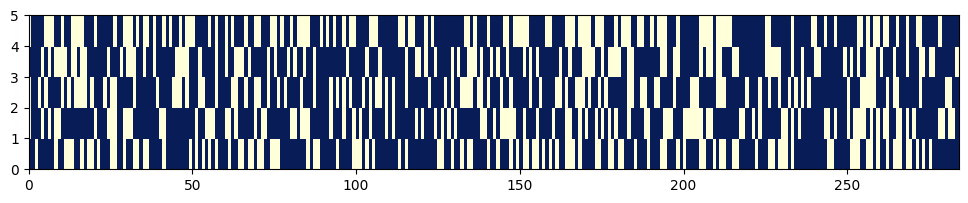

In [ ]:
# И визуализируем (синим цветом показаны данные, которые попали в обучающую выборку)
fig, ax = plt.subplots(figsize=(12,2))
ax.pcolor(bin_array, cmap='YlGnBu')
plt.show()

In [ ]:
# Оценим Out-of-bag error, теоретическое значение 37%
for i in range(5):
    cur_data = bin_array[i]
    len_cur_data = len(cur_data)
    sum_cur_data = sum(cur_data)
    (len(bin_array[0]) - sum(bin_array[0])) / len(bin_array[0])
    oob_i = (len_cur_data - sum_cur_data) / len_cur_data
    print('Для модели № {} размер OOB составляет {}%'.format(i+1, round(oob_i, 4)*100.0))

Для модели № 1 размер OOB составляет 37.68%
Для модели № 2 размер OOB составляет 36.27%
Для модели № 3 размер OOB составляет 34.86%
Для модели № 4 размер OOB составляет 35.56%
Для модели № 5 размер OOB составляет 40.849999999999994%


In [ ]:
# Out-of-bag error, возвращаемый классификатором
# Для классификации используется метрика accuracy
bc1.oob_score_, 1-bc1.oob_score_

(0.9154929577464789, 0.08450704225352113)

## 4.2)Обучите следующие ансамблевые модели: одну из моделей группы бустинга;

In [ ]:
# Обучим классификатор на 5 деревьях
ab1 = GradientBoostingClassifier(n_estimators=5, random_state=10)
ab1.fit(BC_X_train, BC_y_train)

GradientBoostingClassifier(n_estimators=5, random_state=10)

In [ ]:
# Out-of-bag error, возвращаемый классификатором
# Для классификации используется метрика accuracy
ab1.score(BC_X_test,BC_y_test)

0.9017543859649123

## 4.3)Обучите следующие ансамблевые модели: одну из моделей группы стекинга.

In [ ]:
from heamy.estimator import Regressor, Classifier
from heamy.pipeline import ModelsPipeline
from heamy.dataset import Dataset


In [ ]:
boston = load_iris()
boston_X, boston_y = boston['data'], boston['target']
boston_X_train, boston_X_test, boston_y_train, boston_y_test = train_test_split(
    boston_X, boston_y, test_size=0.2, random_state=1)

In [ ]:
# Качество отдельных моделей
def val_mae(model):
    model.fit(boston_X_train, boston_y_train)
    y_pred = model.predict(boston_X_test)
    result = mean_absolute_error(boston_y_test, y_pred)
    print(model)
    print('MAE={}'.format(result))

In [ ]:
# Точность на отдельных моделях
for model in [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=50)
]:
    val_mae(model)
    print('==========================')
    print()

LinearRegression()
MAE=0.20421913597428992

DecisionTreeRegressor()
MAE=0.03333333333333333

RandomForestRegressor(n_estimators=50)
MAE=0.035333333333333335



In [ ]:
# Используем библиотеку heamy
# набор данных
dataset = Dataset(boston_X_train, boston_y_train, boston_X_test)

# модели первого уровня
model_tree = Regressor(dataset=dataset, estimator=DecisionTreeRegressor, name='tree')
model_lr = Regressor(dataset=dataset, estimator=LinearRegression,name='lr')
model_rf = Regressor(dataset=dataset, estimator=RandomForestRegressor, parameters={'n_estimators': 50},name='rf')

In [ ]:
# Эксперимент 1
# Первый уровень - две модели: дерево и линейная регрессия
# Второй уровень: линейная регрессия

pipeline = ModelsPipeline(model_tree, model_lr)
stack_ds = pipeline.stack(k=10, seed=1)
# модель второго уровня
stacker = Regressor(dataset=stack_ds, estimator=LinearRegression)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [0.09855225393260302, 0.05513163692677401, 0.12019959034079447, 0.1281020663918626, 0.1315852642204002, 0.12140132330966025, 0.14083833015768113, 0.07243747269855232, 0.05375269746408776, 0.056055606326609865]
Mean accuracy: 0.09780562417690256
Standard Deviation: 0.03334350478009641
Variance: 0.0011117893110203121


In [ ]:
# Эксперимент 2
# Первый уровень - две модели: дерево и линейная регрессия
# Второй уровень: случайный лес

stacker = Regressor(dataset=stack_ds, estimator=RandomForestRegressor)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [0.003333333333333336, 0.0, 0.025000000000000005, 0.014999999999999994, 0.09583333333333333, 0.009166666666666675, 0.02833333333333334, 0.023333333333333317, 0.0, 0.0]
Mean accuracy: 0.019999999999999997
Standard Deviation: 0.02734298610044062
Variance: 0.0007476388888888889


In [ ]:
# Эксперимент 3
# Первый уровень - три модели: дерево, линейная регрессия и случайный лес
# Второй уровень: линейная регрессия
pipeline = ModelsPipeline(model_tree, model_lr, model_rf)
stack_ds3 = pipeline.stack(k=10, seed=1)
# модель второго уровня
stacker = Regressor(dataset=stack_ds3, estimator=LinearRegression)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [0.07283389888756775, 0.04467163061319813, 0.115628838400734, 0.10816200551543664, 0.14192202162157283, 0.09789960073498831, 0.12992507801188594, 0.06386392167051741, 0.03400588994590719, 0.03163300289625622]
Mean accuracy: 0.08405458882980645
Standard Deviation: 0.038157575838039415
Variance: 0.0014560005938357293


In [ ]:
# Эксперимент 4
# Первый уровень - три модели: дерево, линейная регрессия и случайный лес
# Второй уровень: случайный лес
# Результат хуже чем в эксперименте 3
stacker = Regressor(dataset=stack_ds3, estimator=RandomForestRegressor)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [0.01833333333333335, 0.023333333333333334, 0.065, 0.0375, 0.08666666666666667, 0.003333333333333336, 0.057499999999999996, 0.03583333333333335, 0.0, 0.0]
Mean accuracy: 0.03275
Standard Deviation: 0.028104591360764448
Variance: 0.0007898680555555556
